In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.patches as patches

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

In [62]:
ds=0.5
lx=2000
ly=400
Nx=int(lx/ds)
Ny=int(ly/ds)

In [63]:
mat_m=pd.read_csv('f_m.dat', sep=' ', names=np.arange(Ny), index_col=False, dtype=np.float64)
vmin=np.min(mat_m.values)
# m.columns=['%s'%str(a) for a in np.arange(5000)]
# m.to_parquet('/home/invites/benvegnen/AI2D/PDEs_2d/f_m.parquet')

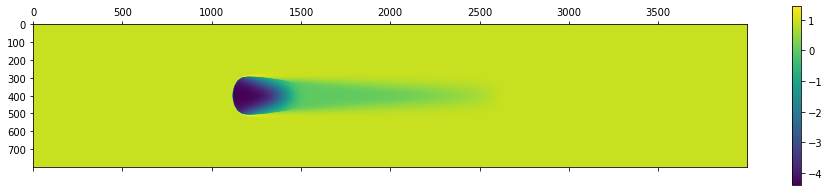

In [69]:
t=3
plt.matshow(mat_m.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()

-4.379023

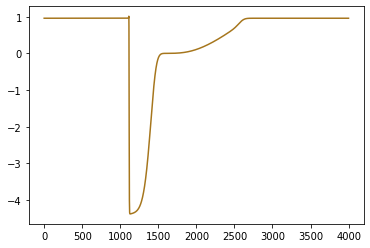

In [70]:
plt.plot(mat_m.values[t*Nx:(t+1)*Nx,:].T[400,:])
np.min(mat_m.values[t*Nx:(t+1)*Nx,:].T[400,:])

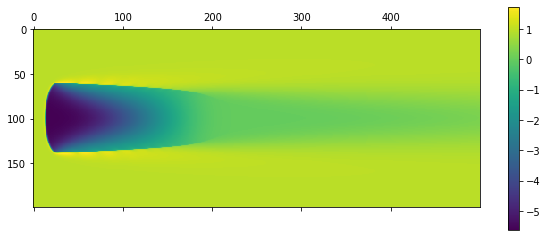

In [161]:
t=8
plt.matshow(mat_m.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()

In [213]:
mat_rho=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_rho.dat', sep=' ', names=np.arange(Ny), index_col=False, dtype=np.float64)
# rho.columns=['%s'%str(a) for a in np.arange(5000)]
# rho.to_parquet('/home/invites/benvegnen/AI2D/PDEs_2d/f_rho.parquet')

No handles with labels found to put in legend.


Text(0.5, 1.0, '$m(x, y=100)$')

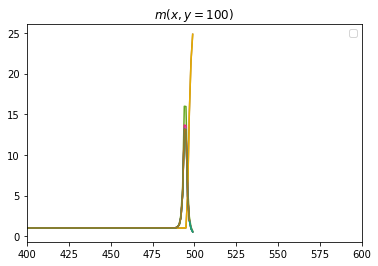

In [218]:
for t in np.arange(0, 15,1):
    m=mat_rho.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:])#, label=r'$t=%d$'%(1*t))
plt.legend()
plt.xlim(400,600)
# plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

Text(0.5, 1.0, '$m(x, y=100)$')

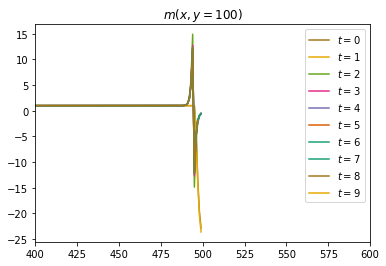

In [219]:
for t in np.arange(0, 10):
    m=mat_m.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:], label=r'$t=%d$'%(1*t))
plt.legend()
plt.xlim(400,600)
# plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

In [216]:
rho0=1.
t=5
V=np.max(np.max(np.abs(mat_rho.values[t*Nx:(t+1)*Nx,:])))/rho0
print(np.linspace(0, -V, 5))

for t in np.arange(2, 30,1):
    m=mat_m.values[t*Nx:(t+1)*Nx,:].T
    xmin=np.where((np.roll(m[np.int64(Ny/2),:],1)>0)&(m[np.int64(Ny/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(Ny/2),xmin+1:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(Ny/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    print(xmin, xmax, ymin, ymax)
    l=plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$m(x,y)/\rho_0$', rotation=0)

    offsetx=0.5*(xmax-xmin)
    offsety=0.2*(ymax-ymin)
    plt.xlim(xmin-offsetx, xmax+offsetx)
    plt.ylim(ymin-offsety, ymax+offsety)

    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.linspace(0, -V, 5)[::-1], colors=['k'])
    
    plt.xticks([xmin, xmax])
    plt.title(r'$t=%d$'%(10*t), pad=20)
    plt.show()
    



[  0.         -3.2904225  -6.580845   -9.8712675 -13.16169  ]


IndexError: index 0 is out of bounds for axis 0 with size 0

# Centering procedure

In [425]:
mat_m={}
for t in np.arange(0,1000,100):
    #mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64,  header=0, index_col=False)
    mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64, index_col=False, names=np.arange(501))


FileNotFoundError: [Errno 2] File /home/invites/benvegnen/AI2D/PDEs_2d/f_m_t700.dat does not exist: '/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t700.dat'

In [397]:
t=0
plt.matshow(mat_m[t].drop('X', axis=1).T)

yabs=np.int64(np.linspace(0, mat_m[t].shape[1]-2, 5))
plt.yticks(yabs, np.int64(np.array(list(mat_m[t])[1:])[yabs]))

xabs=np.int64(np.linspace(0, mat_m[t].shape[0]-1, 5))
plt.xticks(xabs, np.int64(np.array(list(mat_m[t].X))[xabs]))

plt.colorbar()

KeyError: "['X'] not found in axis"

In [879]:
Ny=300

mat_m={}
for t in np.arange(0,2000,100):
    print(t)
    mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64, names=np.arange(Ny+2))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


200


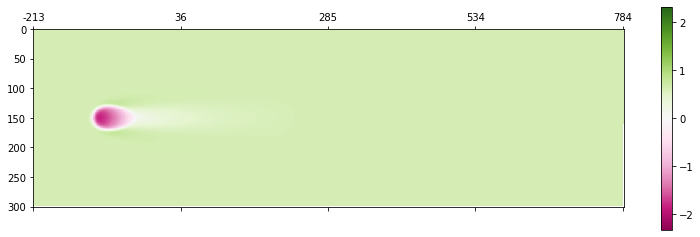

In [883]:
kt=2

t=list(mat_m)[kt]
print(t)
V=np.nanmin(mat_m[0].values)/10
plt.matshow(mat_m[t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[t][0])[xabs]))

# plt.xlim(180,250)
# plt.ylim(140,160)

plt.show()


#plt.matshow(np.isnan(mat_m[t].T))

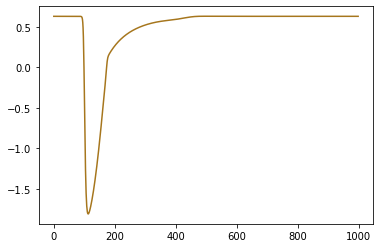

In [884]:
plt.plot(mat_m[t].T.values[150,:])


In [772]:
1/np.array([0.25, 0.40, 0.55, 0.70, 0.85, 1.0])

array([4.        , 2.5       , 1.81818182, 1.42857143, 1.17647059,
       1.        ])